# ID Graph Exploration

In [1]:
model_name = "user_id_stitcher"

In [2]:
import os

import matplotlib.pyplot as plt
import networkx as nx
import snowflake.connector
import yaml

In [3]:
with open("../pb_project.yaml", "r") as f:
    connection_name = yaml.load(f, Loader=yaml.FullLoader).get("connection")

with open(f"{os.path.expanduser('~')}/.pb/siteconfig.yaml") as f:
    creds = yaml.load(f, Loader=yaml.FullLoader)["connections"][connection_name]["outputs"]["dev"]

In [4]:
ctx = snowflake.connector.connect(
    user=creds["user"],
    password=creds["password"],
    account=creds["account"],
    warehouse=creds["warehouse"],
    database=creds["dbname"],
    schema=creds["schema"]
)
cur = ctx.cursor()
sql = f"SELECT * FROM {creds['dbname']}.{creds['schema']}.{model_name}"
cur.execute(sql)
id_graph = cur.fetch_pandas_all()

In [5]:
id_graph.head()

,USER_MAIN_ID,OTHER_ID,OTHER_ID_TYPE,VALID_AT,FIRST_SEEN_AT
0,rid9e6998173ae3f2a421c43d5cb9246638,deliabednar@junior-girlfriend.com,email,2024-03-09 13:56:51.141,2024-03-09 13:56:51.141
1,ridda78f13cc059857d4a7b3926ee23864b,69b5d69d-c64a-4a7a-b476-e837f9ea3761,anonymous_id,2024-03-09 13:57:23.400,2024-03-09 13:57:23.400
2,rid5c32c5a1355e43b4760318dfa7fa840a,e6c1f19b-6a95-46e4-ae4c-a6aeaf8c030c,anonymous_id,2024-03-09 13:56:49.172,2024-03-09 13:56:49.172
3,rid0b747f0f37377e61c59f7b24801e336b,482d17b6-dc36-4cb9-b2c5-8a15f2f32d0a,anonymous_id,2024-03-09 13:57:06.291,2024-03-09 13:57:06.291
4,rid3df8bda9dddd86a68bbf53cd978030ee,4043bbb1-7f35-406c-b5e6-12a6c4036c3f,anonymous_id,2024-03-09 13:57:01.232,2024-03-09 13:57:01.232


In [6]:
id_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   USER_MAIN_ID   265 non-null    object        
 1   OTHER_ID       265 non-null    object        
 2   OTHER_ID_TYPE  265 non-null    object        
 3   VALID_AT       265 non-null    datetime64[ns]
 4   FIRST_SEEN_AT  265 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 10.5+ KB


In [7]:
id_graph.describe()

,VALID_AT,FIRST_SEEN_AT
count,265,265
mean,2024-03-09 15:55:55.359780864,2024-03-09 15:55:55.357886720
min,2024-03-09 13:54:48.123000,2024-03-09 13:54:48.123000
25%,2024-03-09 13:56:48.971000064,2024-03-09 13:56:48.971000064
50%,2024-03-09 13:57:01.032000,2024-03-09 13:57:01.032000
75%,2024-03-09 13:57:08.920000,2024-03-09 13:57:08.920000
max,2024-03-13 23:15:15.793000,2024-03-13 23:15:15.793000


In [8]:
id_graph.describe(include=object)

,USER_MAIN_ID,OTHER_ID,OTHER_ID_TYPE
count,265,265,265
unique,147,265,4
top,ridfe6f4d95aa306184d6462db1d7f5d57c,deliabednar@junior-girlfriend.com,anonymous_id
freq,5,1,148


In [9]:
rudder_id = "USER_MAIN_ID"

print("Profile count:            ", len(id_graph[rudder_id].unique()))
print("ID count:                 ", len(id_graph["OTHER_ID"].unique()))
print("Average ID count/profile: ", id_graph.groupby(rudder_id)["OTHER_ID"].count().mean())
print("Maximum ID count/profile: ", id_graph[rudder_id].value_counts().max())

Profile count:             147
ID count:                  265
Average ID count/profile:  1.8027210884353742
Maximum ID count/profile:  5


In [10]:
id_graph.groupby("OTHER_ID_TYPE")["OTHER_ID"].count()

OTHER_ID_TYPE
anonymous_id    148
email            39
phone            39
user_id          39
Name: OTHER_ID, dtype: int64

In [11]:
id_graph[rudder_id].value_counts().nlargest(10)

USER_MAIN_ID
ridfe6f4d95aa306184d6462db1d7f5d57c    5
rid9e6998173ae3f2a421c43d5cb9246638    4
rid2f5508b9b92013fb78b81bfbd90ebeb1    4
ridec001945cdca59f2f606c4479ee49b6f    4
rid32c964b8202e852d0df47920b8a78762    4
rid2b0b00603a0be60c70c22cf53461e076    4
rid641e30cce8c36bc063605eed5c3fee4d    4
rid0f4db0afa3a9a064321df4da8c82b3f0    4
ridb11174fa0c128328d1054cdb4b96da7a    4
rid3da3d3b7da212eb8392bea06e1d8a942    4
Name: count, dtype: int64

In [12]:
most_frequent_main_id = id_graph[rudder_id].mode()[0]
id_graph[id_graph[rudder_id] == most_frequent_main_id]

,USER_MAIN_ID,OTHER_ID,OTHER_ID_TYPE,VALID_AT,FIRST_SEEN_AT
68,ridfe6f4d95aa306184d6462db1d7f5d57c,563fc39a-9d0a-49c1-b669-4650522970a3,anonymous_id,2024-03-13 23:15:15.792,2024-03-13 23:15:15.791
81,ridfe6f4d95aa306184d6462db1d7f5d57c,b5fe5115-84c5-493d-a91c-d25e55bfcdda,anonymous_id,2024-03-13 23:15:15.793,2024-03-13 23:15:15.793
83,ridfe6f4d95aa306184d6462db1d7f5d57c,521-710-4869,phone,2024-03-13 23:15:15.792,2024-03-13 23:15:15.792
142,ridfe6f4d95aa306184d6462db1d7f5d57c,hoytmacejkovic@those-mortise.com,email,2024-03-13 23:15:15.792,2024-03-13 23:15:15.792
196,ridfe6f4d95aa306184d6462db1d7f5d57c,b89902e2-e23d-45af-87f1-2664927ed77e,user_id,2024-03-13 23:15:15.792,2024-03-13 23:15:15.792


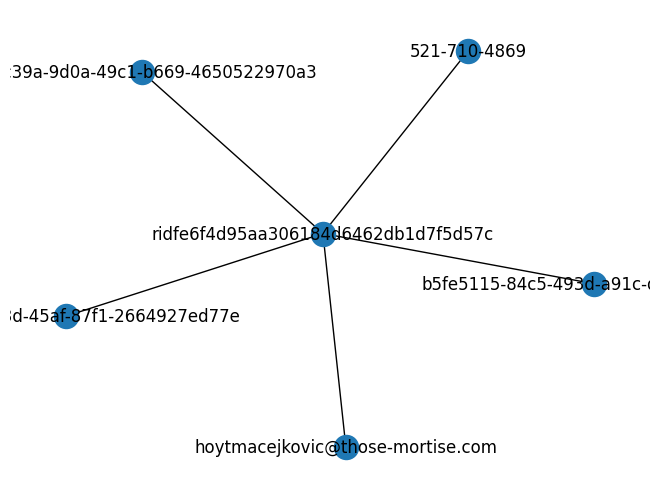

In [13]:
G = nx.Graph()
for index, row in id_graph.iterrows():
    if row[rudder_id] == most_frequent_main_id:
        G.add_nodes_from([
            (row[rudder_id], {"type": "main_id"}),
            (row["OTHER_ID"], {"type": row["OTHER_ID_TYPE"]}),
        ])
        G.add_edge(row[rudder_id], row["OTHER_ID"])

plt.tight_layout()
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)